In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import sklearn.datasets
import math


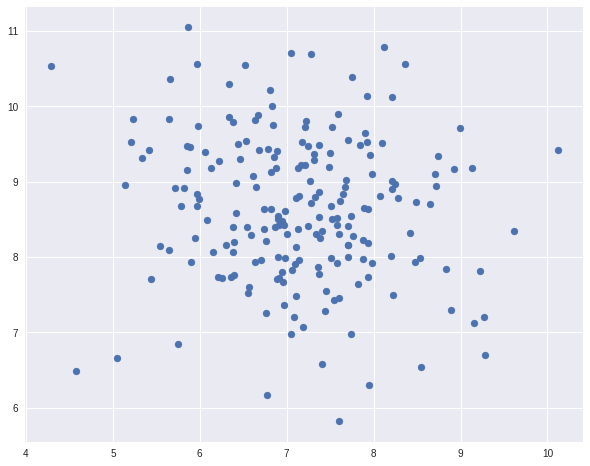

In [2]:
####---  Ploting the raw data set ---####

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
np.random.seed(1)

x, y =sklearn.datasets.make_blobs(n_samples=200, n_features=2, centers=1, cluster_std=1, center_box=(5, 10.0), shuffle=True, random_state=None)

plt.scatter(x[:,0],x[:,1])



**Histogram plot to verify that the data is fits well with the gaussian distribution**

(array([ 2.,  7., 19., 27., 50., 49., 26., 12.,  6.,  2.]),
 array([ 4.29202502,  4.87441923,  5.45681345,  6.03920766,  6.62160187,
         7.20399608,  7.78639029,  8.3687845 ,  8.95117871,  9.53357292,
        10.11596714]),
 <a list of 10 Patch objects>)

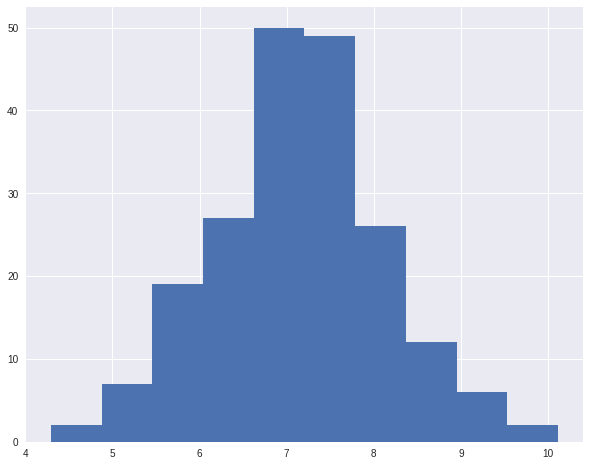

In [31]:
plt.hist((x[:,0]))

(array([ 3.,  6., 10., 24., 46., 37., 36., 24.,  6.,  8.]),
 array([ 5.819088  ,  6.34227831,  6.86546862,  7.38865893,  7.91184925,
         8.43503956,  8.95822987,  9.48142018, 10.00461049, 10.5278008 ,
        11.05099112]),
 <a list of 10 Patch objects>)

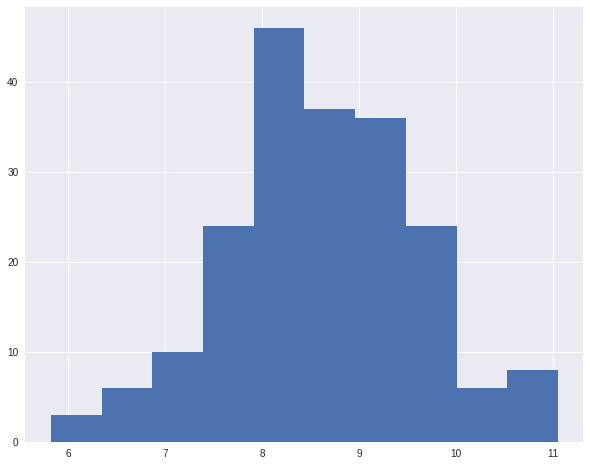

In [30]:
plt.hist((x[:,1]))

In [0]:
###--- Function to calculate probability using gaussian distribution ---###
def calculate_prob(x):
  m=x.shape[0]
  
  mu1=sum(x[:,0])/m
  print(mu1)
  sigma1_square=(sum((x[:,0] - mu1)**2))/m

  mu2=sum(x[:,1])/m

  sigma2_square=(sum((x[:,1]-mu2)**2))/m
  
  const1=1.0/math.sqrt(2*math.pi*sigma1_square)

  p1=const1*(np.exp(-((x[:,0]-mu1)**2)/(2*sigma1_square)))


  const2=1.0/math.sqrt(2*math.pi*sigma2_square)

  p2=const2*(np.exp(-((x[:,1]-mu2)**2)/(2*sigma2_square)))

  px=p1*p2
  
  return(px)
  

In [0]:
### --- Function to predict that the product is anomalus or not --- ### 
def predict(z):
  
  mu1=sum(x[:,0])/m
  
  mu2=sum(x[:,1])/m
  
  sigma1_square=(sum((x[:,0] - mu1)**2))/m
  
  sigma2_square=(sum((x[:,1]-mu2)**2))/m
  
  const1=1.0/math.sqrt(2*math.pi*sigma1_square)
  
  const2=1.0/math.sqrt(2*math.pi*sigma2_square)
  
  p1=const1*(np.exp(-((z[:,0]-mu1)**2)/(2*sigma1_square)))
  
  p2=const2*(np.exp(-((z[:,1]-mu2)**2)/(2*sigma2_square)))
  
  pz=p1*p2

  return(pz)
  


In [27]:
#predicting anomaly

m=x.shape[0]
px=calculate_prob(x)



input_array=np.random.randint(3,11,size=(100,2))


p_predict=predict(input_array)

epsilon=np.min(px)

print(epsilon)



7.145770647784934
0.0003381266852762238


**The red point indicates the anomalus behaviour and the green points represent the product is fine!!**

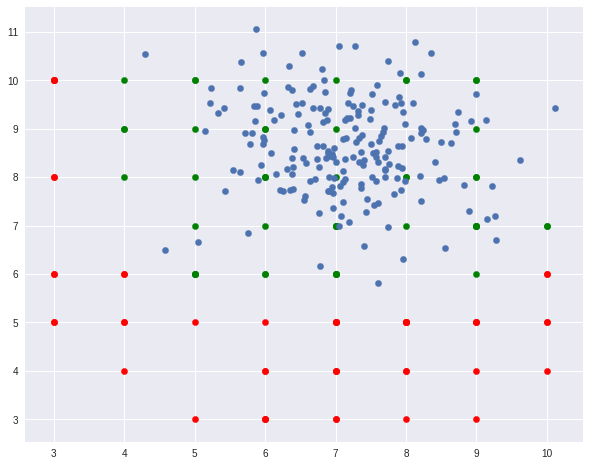

In [25]:
for i in range(len(p_predict)):
  if p_predict[i]>=epsilon :
    
    plt.scatter(input_array[i,0],input_array[i,1],s=40,c="green")
  else :
    
    plt.scatter(input_array[i,0],input_array[i,1],s=40,c="red")
    
    
plt.scatter(x[:,0],x[:,1],s=40)
    
